In [36]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
sns.set(rc={"figure.figsize":[8,8]})
import matplotlib.pyplot as plt

In [2]:
house=pd.read_csv("Houses prices.csv")
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [30]:
house.date = pd.to_datetime(house.date)

In [31]:
house.date.dt.year.value_counts()

2014    4600
Name: date, dtype: int64

In [33]:
house['months']=house.date.dt.month

In [34]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,months
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,5
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5


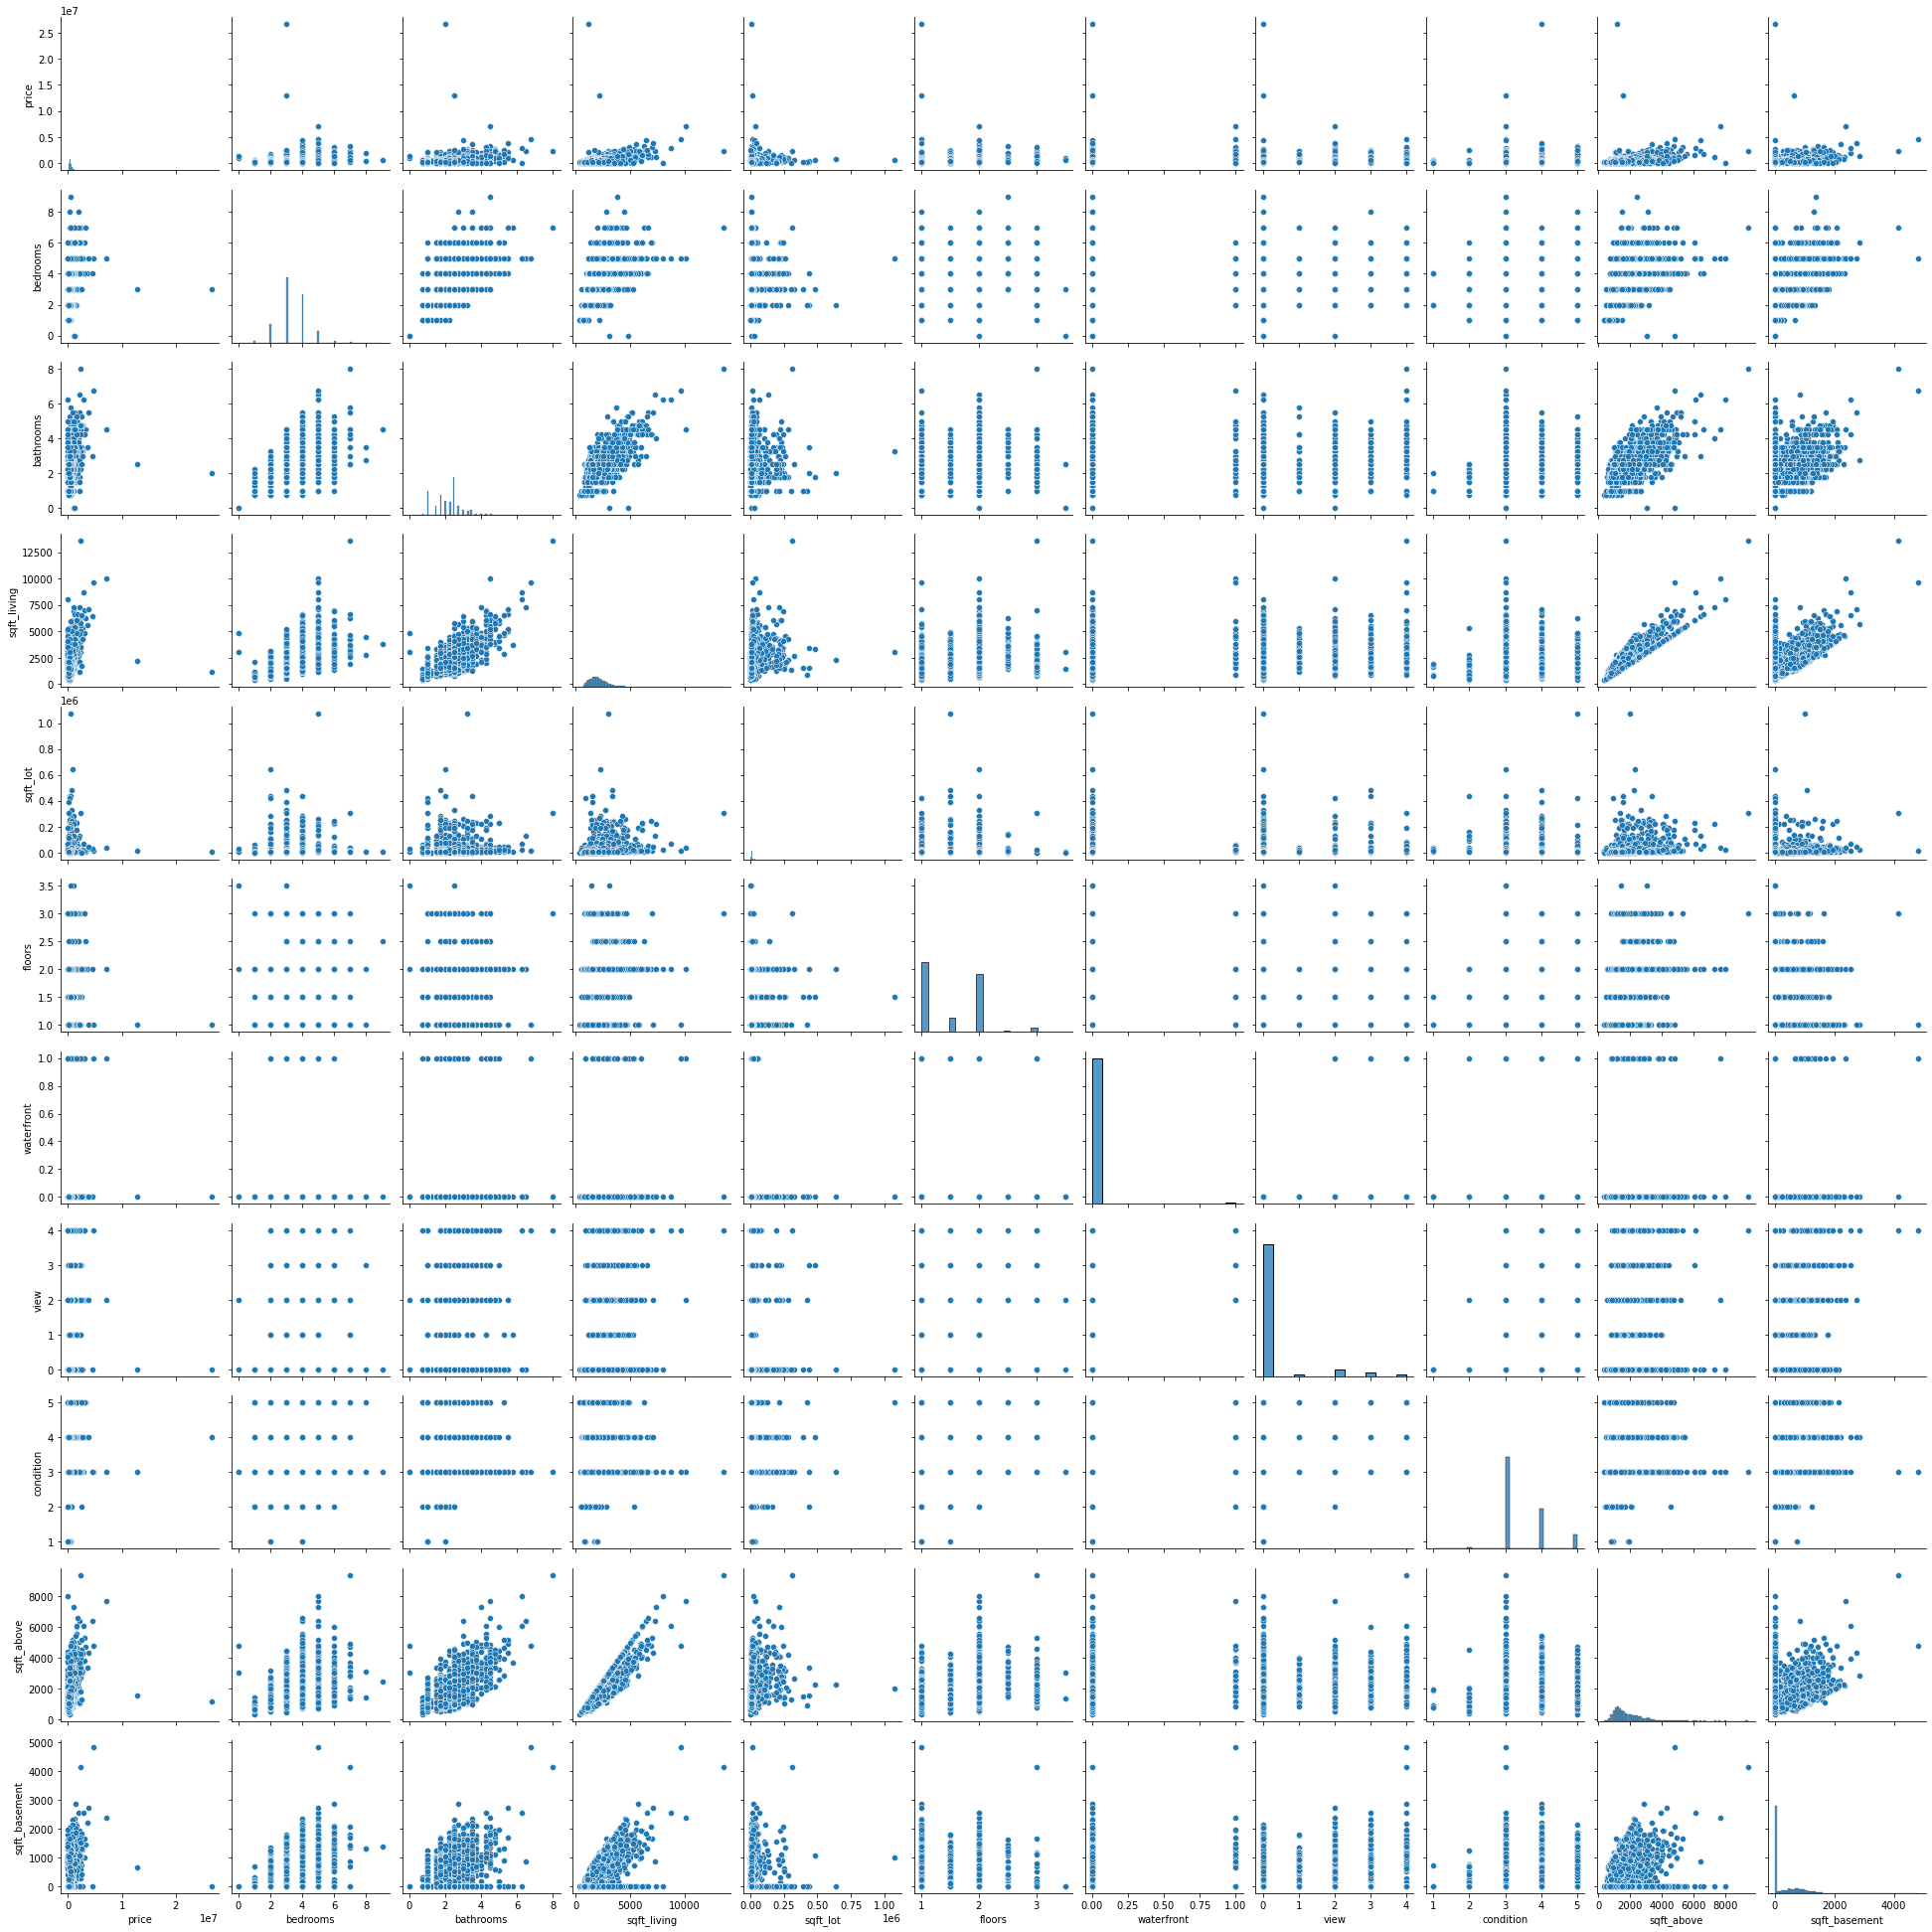

In [8]:
sns.pairplot(house,vars=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])

In [9]:
house['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

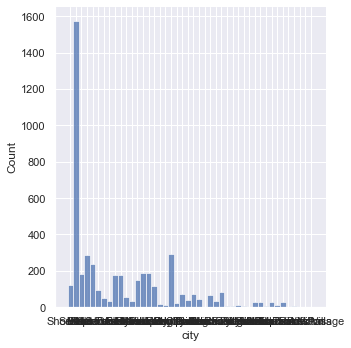

In [17]:
sns.displot(house['city'])

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

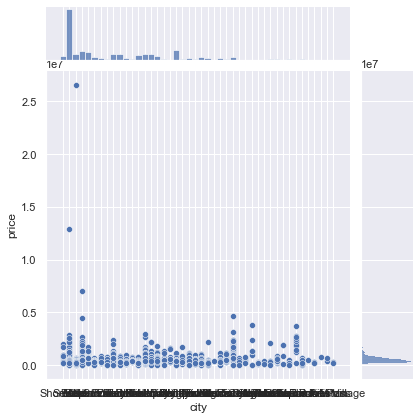

In [56]:
sns.jointplot(data=house,x="city",y="price")

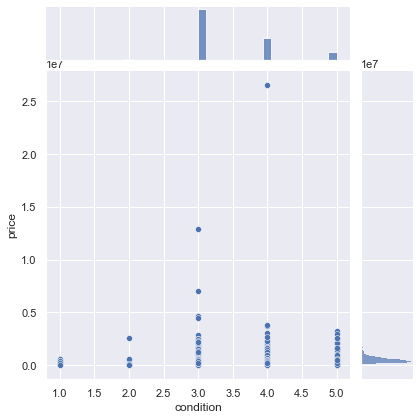

In [28]:
sns.jointplot(data=house,x="condition",y="price")

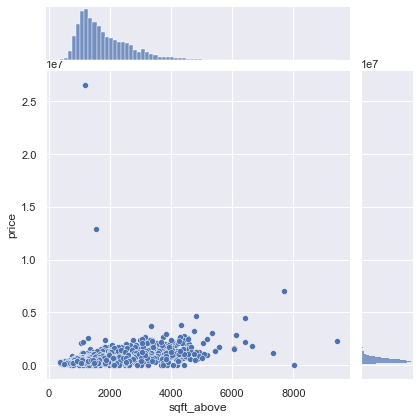

In [19]:
sns.jointplot(data=house,x="sqft_above",y="price")

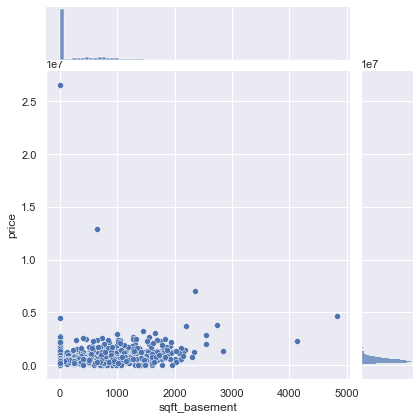

In [21]:
sns.jointplot(data=house,x="sqft_basement",y="price")

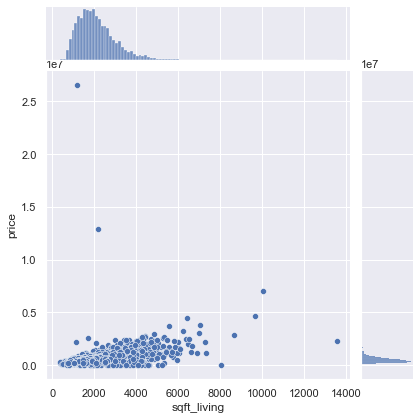

In [22]:
sns.jointplot(data=house,x="sqft_living",y="price")

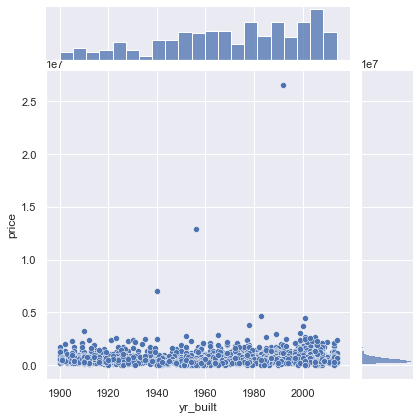

In [23]:
sns.jointplot(data=house,x="yr_built",y="price")

<AxesSubplot:>

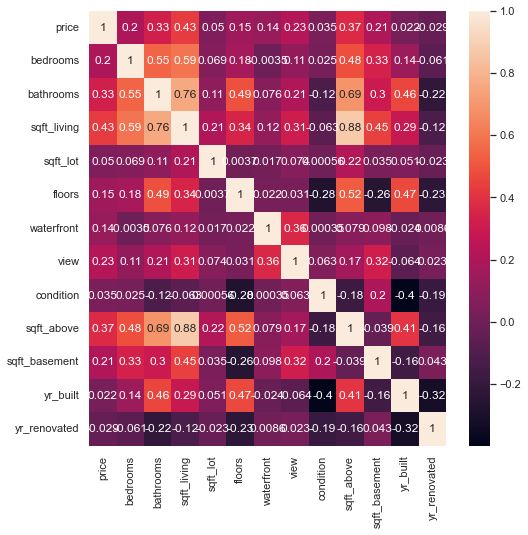

In [24]:
sns.heatmap(house.corr(),annot=True)

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

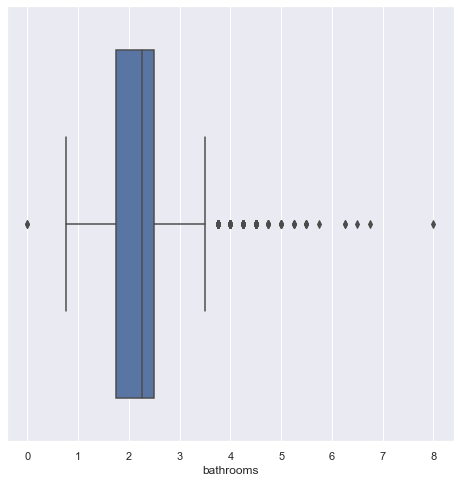

In [26]:
sns.boxplot(house['bathrooms'])

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

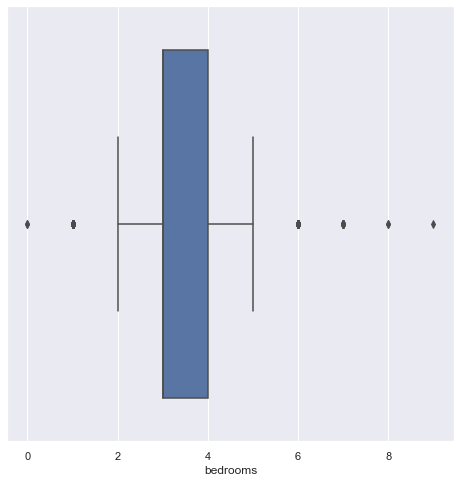

In [27]:
sns.boxplot(house['bedrooms'])

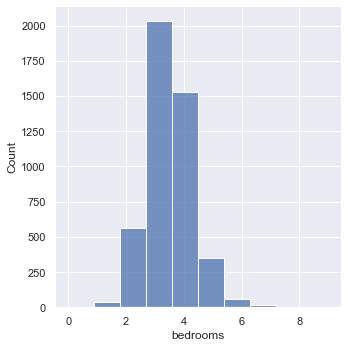

In [29]:
sns.displot(house["bedrooms"],bins=10)

<AxesSubplot:xlabel='months', ylabel='price'>

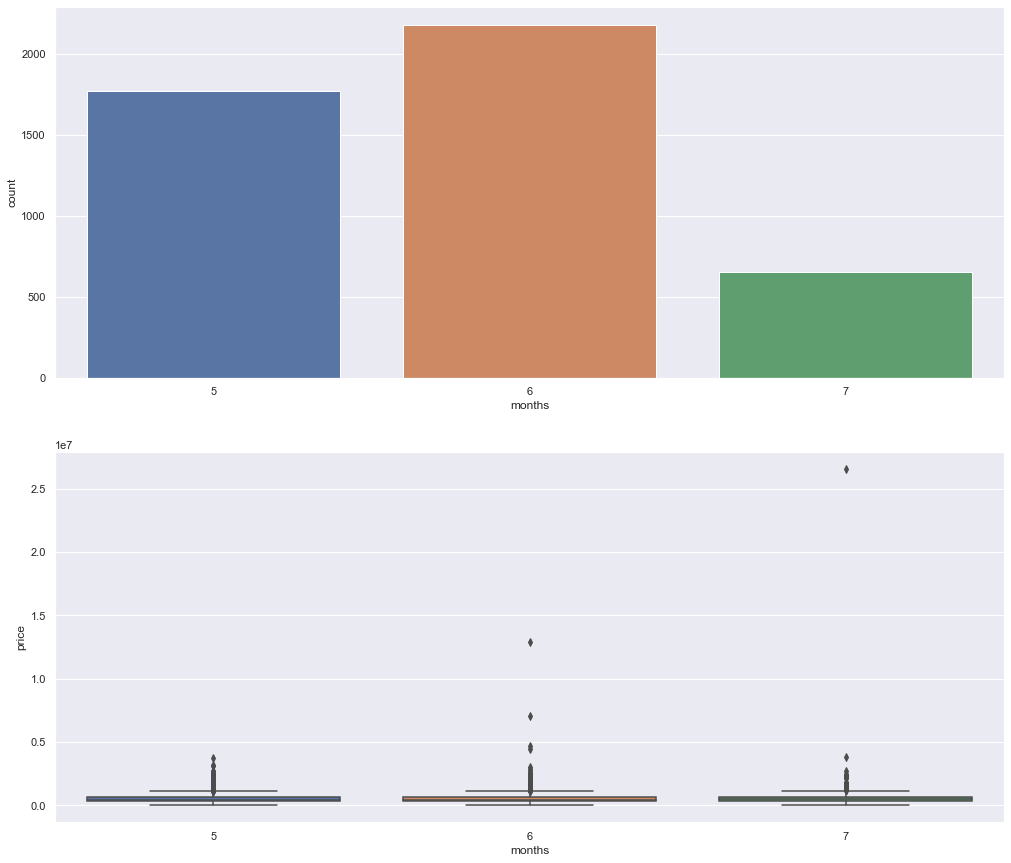

In [40]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=house['months'], ax=ax1)

ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x=house['months'], y=house['price'], ax=ax2)

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='count'>

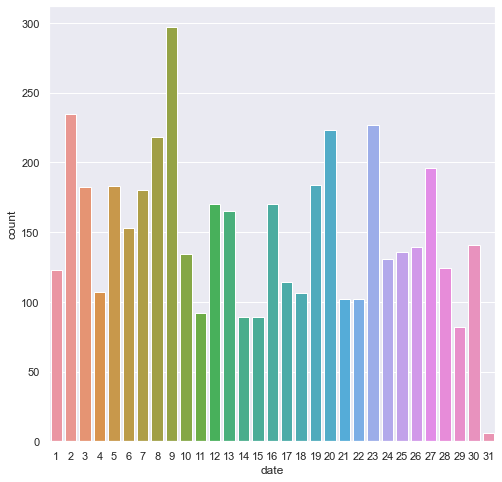

In [41]:
sns.countplot(house.date.dt.day)

In [42]:
house.drop('date', axis=1, inplace=True)

In [43]:
house = house[house.bedrooms < 7]

0    4550
1      33
Name: waterfront, dtype: int64


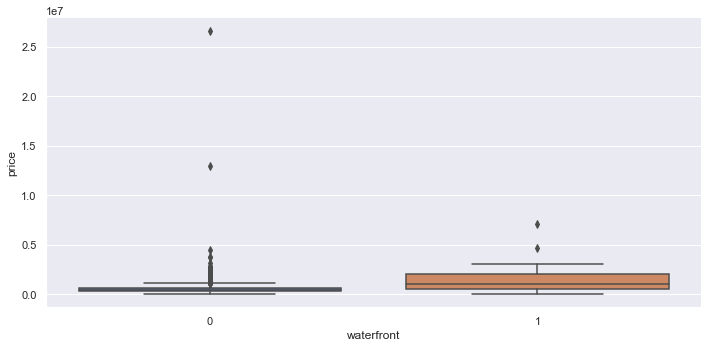

In [44]:
print(house.waterfront.value_counts())
sns.catplot(x='waterfront', y='price', data=house,
            kind='box', height=5, aspect=2)

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

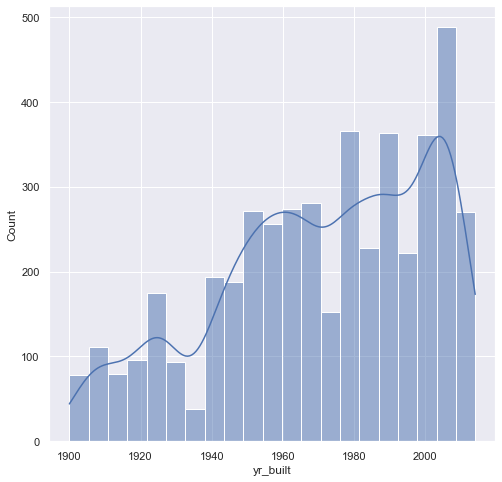

In [45]:
sns.histplot(house.yr_built, kde=True)

In [46]:
house.yr_renovated = house.yr_renovated.apply(lambda x: 0 if x==0 else 1)

C:\Users\Ahmed\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    2728
1    1855
Name: yr_renovated, dtype: int64


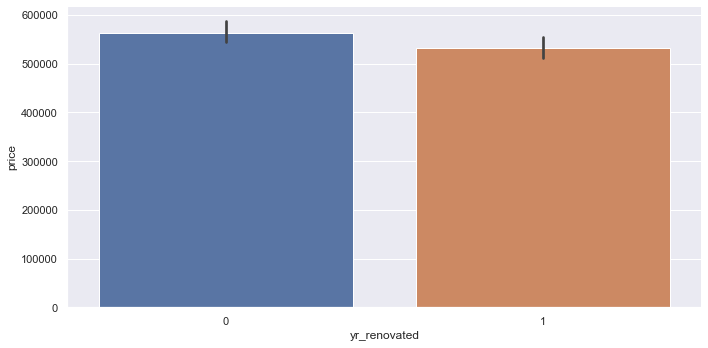

In [47]:
print(house.yr_renovated.value_counts())
sns.catplot(x='yr_renovated', y='price', data=house,
            kind='bar', height=5, aspect=2)

In [48]:
house.drop('street', axis=1, inplace=True)

C:\Users\Ahmed\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='city'>

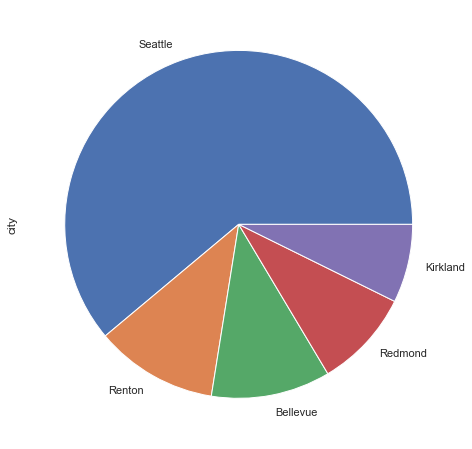

In [49]:
fig = plt.figure(figsize=(12, 8))
# Top 5 cities
house.city.value_counts().head(5).plot.pie()

In [69]:
import  numpy as np
house['bedrooms'] = house['bedrooms'].replace(0, np.NaN)
house['bedrooms'] = house['bedrooms'].fillna(house.bedrooms.median())

house.bedrooms[house.bedrooms==0].count()
house['bathrooms'].replace(to_replace = 0, value = house.bathrooms.median(), inplace= True)

house.bathrooms[house.bathrooms==0].count()

<ipython-input-69-fbab249089c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['bedrooms'] = house['bedrooms'].replace(0, np.NaN)
<ipython-input-69-fbab249089c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['bedrooms'] = house['bedrooms'].fillna(house.bedrooms.median())
C:\Users\Ahmed\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

0

In [70]:
Q75 = np.percentile(house['price'],75)
Q25 = np.percentile(house['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

data1 = house[(house['price']<upper)]

In [62]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4583 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4583 non-null   float64
 1   bedrooms       4583 non-null   float64
 2   bathrooms      4583 non-null   float64
 3   sqft_living    4583 non-null   int64  
 4   sqft_lot       4583 non-null   int64  
 5   floors         4583 non-null   float64
 6   waterfront     4583 non-null   int64  
 7   view           4583 non-null   int64  
 8   condition      4583 non-null   int64  
 9   sqft_above     4583 non-null   int64  
 10  sqft_basement  4583 non-null   int64  
 11  yr_built       4583 non-null   int64  
 12  yr_renovated   4583 non-null   int64  
 13  months         4583 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 666.1 KB


In [61]:

house.drop('country',axis=1,inplace=True)
house.drop('city',axis=1,inplace=True)

C:\Users\Ahmed\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
x=house.drop('price',axis=1)
y=house.price.astype(int)

In [73]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=123)


In [74]:
models = {
    "lr":LinearRegression(),
    "knn":KNeighborsRegressor(),
    "svr":SVR(),
    "dt":DecisionTreeRegressor(),
    "rf":RandomForestRegressor(),

}

In [75]:
for name,model in models.items():
  print(f'using model:{name}')
  model.fit(x_train,y_train)
  print(f'training score:{model.score(x_train,y_train)}')
  print(f'testing score:{model.score(x_test,y_test)}')
  print("-"*50)

using model:lr


ValueError: could not convert string to float: 'Seattle'

In [ ]:
y_pred = model.predict(x_test)
import joblib
joblib.dump(model, 'model.h5')